In [ ]:
import pandas as pd
from google.colab import files

print("Upload Traffic Data Excel:")
traffic_file = files.upload()
traffic_data = pd.read_excel(list(traffic_file.keys())[0])

print("Upload Weather Data Excel:")
weather_file = files.upload()
weather_data = pd.read_excel(list(weather_file.keys())[0])

traffic_data["Timestamp"] = pd.to_datetime(traffic_data["Timestamp"])

weather_data["Timestamp"] = pd.to_datetime(weather_data["Timestamp"], format='%d-%m-%Y %H:%M')
merged_data = pd.merge(traffic_data, weather_data, on=["Region Name", "Timestamp"], how="inner")
merged_data.to_excel("merged_traffic_weather.xlsx", index=False)

files.download("merged_traffic_weather.xlsx")
print("Merged dataset saved and downloaded successfully!")

Upload Traffic Data Excel:


Saving traffic data.xlsx to traffic data.xlsx
Upload Weather Data Excel:


Saving weather data.xlsx to weather data.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Merged dataset saved and downloaded successfully!


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving merged_traffic_weather (2).xlsx to merged_traffic_weather (2).xlsx


In [ ]:
df_original = pd.read_excel(list(uploaded.keys())[0])
df_original.to_csv('its.csv', index=False)

In [ ]:
import pandas as pd
df_original = pd.read_csv('/content/its.csv')

In [ ]:
df_original.drop(columns=['AT'], inplace=True)

In [ ]:
df_original.shape

(35784, 16)

In [ ]:
df_original.isna().sum()

Timestamp             0
Region Name           0
Current Speed         0
Free Flow Speed       0
Traffic Level         0
PM2.5              1007
PM10               1063
NO                  999
NO2                1229
NOx                 852
NH3                1072
SO2                1084
CO                 1158
Ozone               907
RH                  669
WD                  829
dtype: int64

In [ ]:
import pandas as pd

# Load original dataset (before dropping)
df = df_original.copy()

# Ensure Timestamp is in datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Set Timestamp as index for time-based operations
df = df.set_index("Timestamp")

#Fill PM2.5 and pollutants using Time-based Interpolation
pollutant_cols = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "SO2", "CO", "Ozone"]
# Modify this line to ensure index alignment:
for col in pollutant_cols:
    df[col] = df.groupby("Region Name")[col].apply(lambda x: x.interpolate(method="time")).reset_index(level=0, drop=True)
# Reset index to original DataFrame's index
#   .reset_index(level=0, drop=True)


#Fill Weather Parameters using Grouped Median by Station & Month
weather_cols = ["RH", "WD"]
for col in weather_cols:
    df[col] = df.groupby(["Region Name", df.index.month])[col].transform(lambda x: x.fillna(x.median()))

# Fill Traffic Data using Forward Fill & Backward Fill
traffic_cols = ["Current Speed", "Free Flow Speed", "Traffic Level"]
for col in traffic_cols:
    df[col] = df.groupby("Region Name")[col].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

# Reset index to keep Timestamp as a column
df = df.reset_index()

#Drop remaining NaN (if any) after smart filling
# df = df.dropna()

print(f"Restored Data Size: {df.shape[0]} rows")

Restored Data Size: 35784 rows


<ipython-input-9-adc10763bba2>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df.groupby("Region Name")[col].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
<ipython-input-9-adc10763bba2>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df.groupby("Region Name")[col].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
<ipython-input-9-adc10763bba2>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df.groupby("Region Name")[col].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


In [ ]:
df['Region Name'].value_counts()

Region Name
Alipur          5112
Bawana          5112
Dwarka          5112
IHBAS           5112
Jahangirpuri    5112
Najafgarh       5112
Narela          5112
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Timestamp          0
Region Name        0
Current Speed      0
Free Flow Speed    0
Traffic Level      0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
SO2                0
CO                 0
Ozone              0
RH                 0
WD                 0
dtype: int64

In [ ]:
df.describe()

Timestamp  Current Speed  Free Flow Speed  \
count                          35784   35784.000000     35784.000000   
mean   2024-04-16 11:29:59.999999744      24.068087        32.714286   
min              2024-01-01 00:00:00       6.860000        24.000000   
25%              2024-02-23 05:45:00      16.650000        27.000000   
50%              2024-04-16 11:30:00      23.960000        30.000000   
75%              2024-06-08 17:15:00      29.250000        36.000000   
max              2024-07-31 23:00:00      50.000000        50.000000   
std                              NaN       9.551919         7.868932   

       Traffic Level         PM2.5          PM10            NO           NO2  \
count   35784.000000  35784.000000  35784.000000  35784.000000  35784.000000   
mean        0.274293     91.817583    214.700138     15.140910     29.193723   
min         0.010000      1.000000      3.000000      0.100000      0.090000   
25%         0.070000     40.828382    122.245000      3.170000     13.750000   
50%         0.200000     67.850000    185.750000      5.970000     23.750000   
75%         0.500000    119.127500    274.750000     17.500000     37.072500   
max         0.720000    781.500000    996.000000    421.070000    465.800000   
std         0.225856     74.754561    130.797185     24.396289     22.990776   

                NOx           NH3           SO2            CO         Ozone  \
count  35784.000000  35784.000000  35784.000000  35784.000000  35784.000000   
mean      27.550805     32.892521     14.153921      1.127773     42.977303   
min        0.000000      0.010000      0.100000      0.000000      0.100000   
25%       11.280000     21.650000      6.500000      0.754464     12.180000   
50%       19.930000     29.420000     10.620000      1.000000     27.180000   
75%       36.100000     40.080000     17.430000      1.350000     61.357500   
max      461.800000    338.800000    171.780000      8.930000    200.000000   
std       26.169133     19.978270     12.941185      0.692976     41.903522   

                 RH            WD  
count  35784.000000  35784.000000  
mean      55.966017    181.938517  
min        1.170000      1.000000  
25%       38.250000    132.105000  
50%       54.105000    181.500000  
75%       75.000000    239.517500  
max       99.000000    353.530000  
std       21.252128     69.714553

In [ ]:
df.shape

(35784, 16)

In [ ]:
df.columns

Index(['Timestamp', 'Region Name', 'Current Speed', 'Free Flow Speed',
       'Traffic Level', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO', 'Ozone', 'RH', 'WD'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
# Feature generation techniques to make the dataset more robust
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Congestion Factor'] = df.apply(lambda row: np.log( 1+ ((row['Free Flow Speed'] - row['Current Speed']) / (row['Free Flow Speed']+1))), axis=1) # congestion factor defines the congestion level of the road in range(0,1)
df['PM2.5_PM10_Ratio'] = df.apply(lambda row: row['PM2.5'] / row['PM10'], axis=1) # tells about coarsity of the particles
df['RH_WD_Interaction'] = df.apply(lambda row: row['RH'] * row['WD'], axis=1) # tells about the interaction of humidity and wind
df['Inverse_Wind_Direction'] = df.apply(lambda row: 1 / row['WD'], axis=1) # tells about the inverse of wind direction which justifies lower the wind-speed high is pollution at that place
df['Mean_Reduced_Gases'] = df.apply(lambda row: (row['NO'] + row['NO2'] + row['NOx'] + row['NH3'] + row['SO2'] + row['CO']) / 6, axis=1) # mean of all gases
df['Traffic Index'] = df.apply(lambda row: ((row['Current Speed'] + row['Free Flow Speed']) / (row['Traffic Level'] + 1)),axis=1)

In [ ]:
df

Timestamp Region Name  Current Speed  Free Flow Speed  \
0     2024-01-01 00:00:00      Alipur          47.74               50   
1     2024-01-01 01:00:00      Alipur          47.58               50   
2     2024-01-01 02:00:00      Alipur          48.25               50   
3     2024-01-01 03:00:00      Alipur          48.91               50   
4     2024-01-01 04:00:00      Alipur          50.00               50   
...                   ...         ...            ...              ...   
35779 2024-07-31 19:00:00      Narela          13.83               30   
35780 2024-07-31 20:00:00      Narela          10.06               30   
35781 2024-07-31 21:00:00      Narela          25.33               30   
35782 2024-07-31 22:00:00      Narela          26.15               30   
35783 2024-07-31 23:00:00      Narela          26.06               30   

       Traffic Level   PM2.5   PM10    NO    NO2    NOx  ...    CO   Ozone  \
0               0.06  140.50  185.0  2.22  19.62  12.25  ...  1.10   17.43   
1               0.06  143.75  196.0  2.30  18.42  11.70  ...  1.10   21.20   
2               0.04  141.25  190.0  3.40  19.40  13.10  ...  1.00   21.85   
3               0.03  143.25  193.0  1.18  20.90  12.10  ...  1.00   19.82   
4               0.01  141.75  186.0  2.02  21.35  13.00  ...  1.10   16.65   
...              ...     ...    ...   ...    ...    ...  ...   ...     ...   
35779           0.55   27.00  125.0  4.12   9.65   8.43  ...  0.70  147.85   
35780           0.67   11.00   29.0  4.47  12.05  10.05  ...  0.73  143.47   
35781           0.17    6.00   14.0  6.50  24.05  17.98  ...  0.78  136.68   
35782           0.14   12.00   14.0  6.90  24.10  18.43  ...  0.76  119.75   
35783           0.14    7.00   14.0  3.70  21.32  13.35  ...  0.68  107.85   

          RH      WD  Congestion Factor  PM2.5_PM10_Ratio  RH_WD_Interaction  \
0      76.45   55.98           0.043360          0.759459          4279.6710   
1      76.83   51.17           0.046360          0.733418          3931.3911   
2      76.53  167.55           0.033738          0.743421         12822.6015   
3      76.32  230.73           0.021147          0.742228         17609.3136   
4      76.65  241.52           0.000000          0.762097         18512.5080   
...      ...     ...                ...               ...                ...   
35779  73.75  218.50           0.419771          0.216000         16114.3750   
35780  85.50  236.50           0.496661          0.379310         20220.7500   
35781  87.00  245.25           0.140323          0.428571         21336.7500   
35782  87.50  244.25           0.117066          0.857143         21371.8750   
35783  88.00  254.50           0.119645          0.500000         22396.0000   

       Inverse_Wind_Direction  Mean_Reduced_Gases  Traffic Index  
0                    0.017864           11.830000      92.207547  
1                    0.019543           11.836667      92.056604  
2                    0.005968           11.933333      94.471154  
3                    0.004334           11.213333      96.029126  
4                    0.004140           11.293333      99.009901  
...                       ...                 ...            ...  
35779                0.004577            8.470000      28.277419  
35780                0.004228            9.028333      23.988024  
35781                0.004077           12.773333      47.290598  
35782                0.004094           12.878333      49.254386  
35783                0.003929           10.888333      49.175439  

[35784 rows x 22 columns]

<ipython-input-18-9ada17a0f78c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='PM2.5', y='Region Name', inner='box', palette='Dark2')


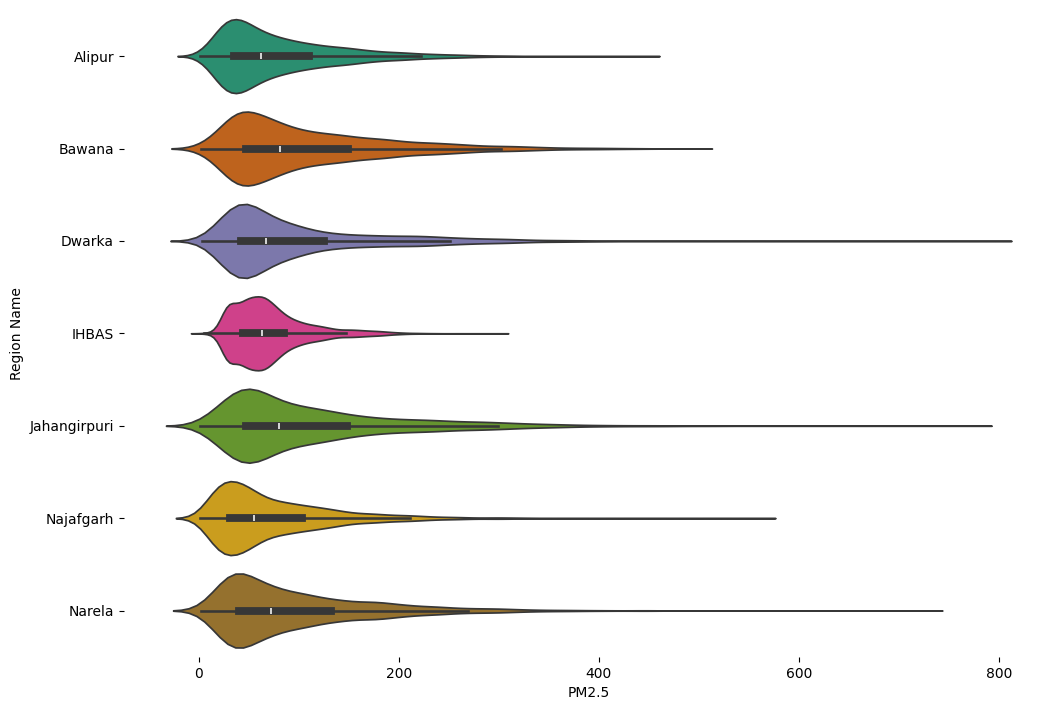

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='PM2.5', y='Region Name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-19-b69f0b11b9db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='PM10', y='Region Name', inner='box', palette='Dark2')


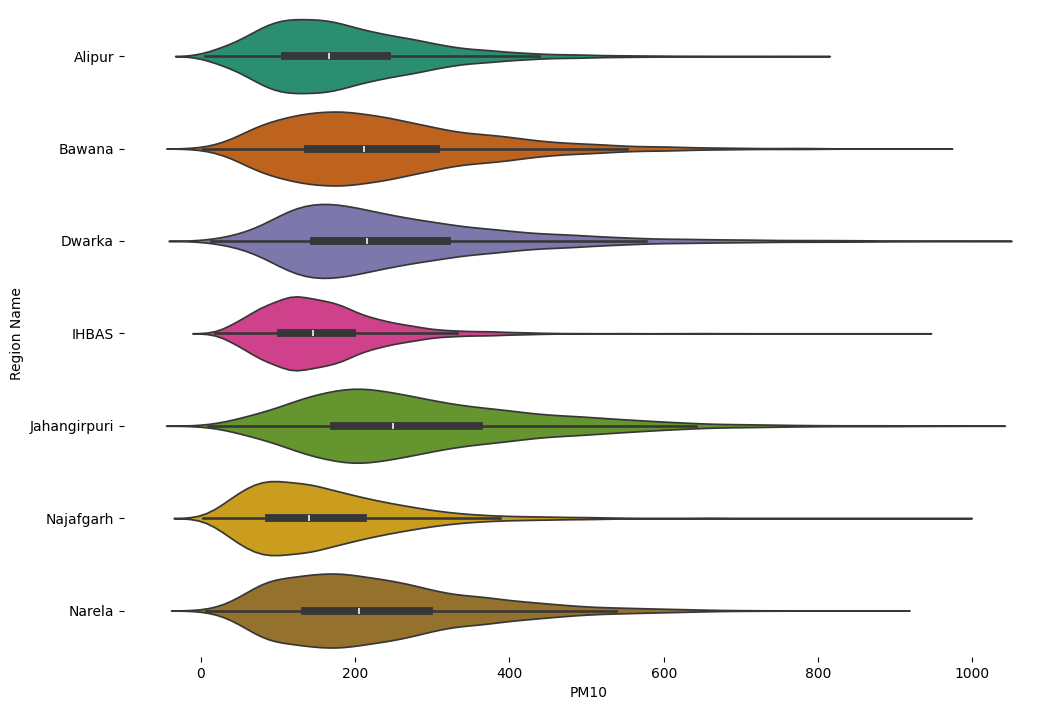

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='PM10', y='Region Name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

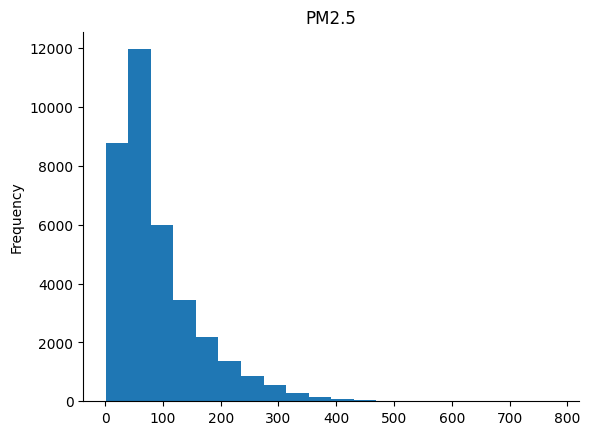

In [ ]:
from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

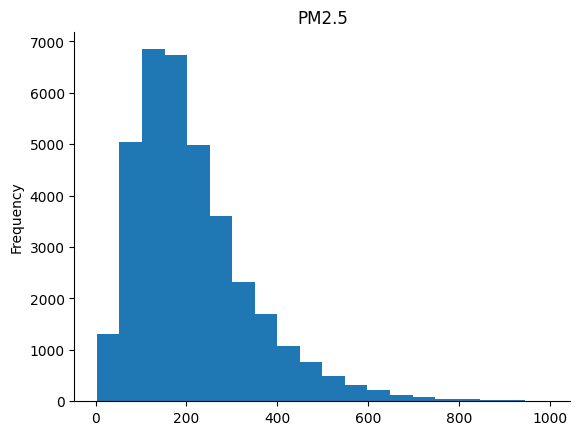

In [ ]:
from matplotlib import pyplot as plt
df['PM10'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

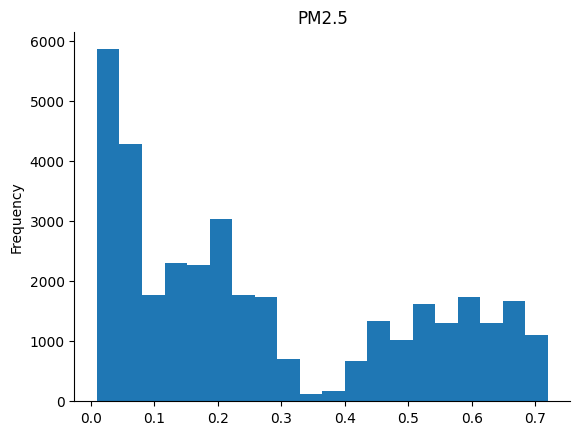

In [ ]:
from matplotlib import pyplot as plt
df['Traffic Level'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

Data is rightly skewed in majorly columns , so we will apply Yeo-Johnson transforms to get rid of skewness
▶




In [ ]:
from scipy.stats import yeojohnson
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

df_transformed = df.copy()

# 2. Apply Yeo-Johnson (which handles zero/negative numbers too)
for col in numeric_cols:
    transformed_data, _ = yeojohnson(df[col])
    df_transformed[col] = transformed_data
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_transformed[numeric_cols]), columns=numeric_cols)

# 4. Combine scaled numeric columns with untouched non-numeric columns
df_final = pd.concat([df_scaled_numeric, df_transformed[non_numeric_cols].reset_index(drop=True)], axis=1)

# (Optional) Maintain the original column order
df_final = df_final[df.columns]

In [ ]:
df_final.describe()

Timestamp  Current Speed  Free Flow Speed  \
count                          35784   35784.000000     35784.000000   
mean   2024-04-16 11:29:59.999999744       0.510647         0.488494   
min              2024-01-01 00:00:00       0.000000         0.000000   
25%              2024-02-23 05:45:00       0.349768         0.260115   
50%              2024-04-16 11:30:00       0.534759         0.450826   
75%              2024-06-08 17:15:00       0.648076         0.706609   
max              2024-07-31 23:00:00       1.000000         1.000000   
std                              NaN       0.219154         0.294417   

       Traffic Level         PM2.5          PM10            NO           NO2  \
count   35784.000000  35784.000000  35784.000000  35784.000000  35784.000000   
mean        0.471256      0.548527      0.556678      0.523655      0.401633   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.157717      0.457415      0.468756      0.387875      0.323472   
50%         0.428119      0.542087      0.555025      0.502060      0.404064   
75%         0.823103      0.640206      0.643786      0.677757      0.476019   
max         1.000000      1.000000      1.000000      1.000000      1.000000   
std         0.330043      0.132474      0.133352      0.186716      0.117577   

                NOx           NH3  ...            CO         Ozone  \
count  35784.000000  35784.000000  ...  35784.000000  35784.000000   
mean       0.507368      0.364292  ...      0.459995      0.561604   
min        0.000000      0.000000  ...      0.000000      0.000000   
25%        0.417904      0.313692  ...      0.387316      0.409049   
50%        0.505082      0.362951  ...      0.459805      0.557179   
75%        0.598031      0.418143  ...      0.541353      0.725233   
max        1.000000      1.000000  ...      1.000000      1.000000   
std        0.123911      0.097312  ...      0.137145      0.210329   

                 RH            WD  Congestion Factor  PM2.5_PM10_Ratio  \
count  35784.000000  35784.000000       35784.000000      35784.000000   
mean       0.619571      0.528650           0.478008          0.292765   
min        0.000000      0.000000           0.000000          0.000000   
25%        0.457866      0.390751           0.172193          0.220308   
50%        0.611265      0.529551           0.448786          0.292582   
75%        0.798749      0.690083           0.824334          0.369763   
max        1.000000      1.000000           1.000000          1.000000   
std        0.199478      0.195254           0.326634          0.100072   

       RH_WD_Interaction  Inverse_Wind_Direction  Mean_Reduced_Gases  \
count       35784.000000            35784.000000        35784.000000   
mean            0.539070                0.304623            0.473070   
min             0.000000                0.000000            0.000000   
25%             0.426193                0.137703            0.390993   
50%             0.535907                0.255327            0.469700   
75%             0.655182                0.405960            0.553137   
max             1.000000                1.000000            1.000000   
std             0.168513                0.209535            0.124505   

       Traffic Index  
count   35784.000000  
mean        0.500834  
min         0.000000  
25%         0.328667  
50%         0.521914  
75%         0.645099  
max         1.000000  
std         0.221605  

[8 rows x 21 columns]

In [ ]:
df = df_final

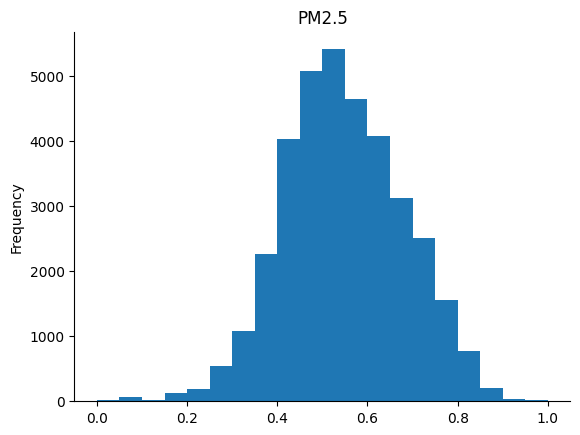

In [ ]:
from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

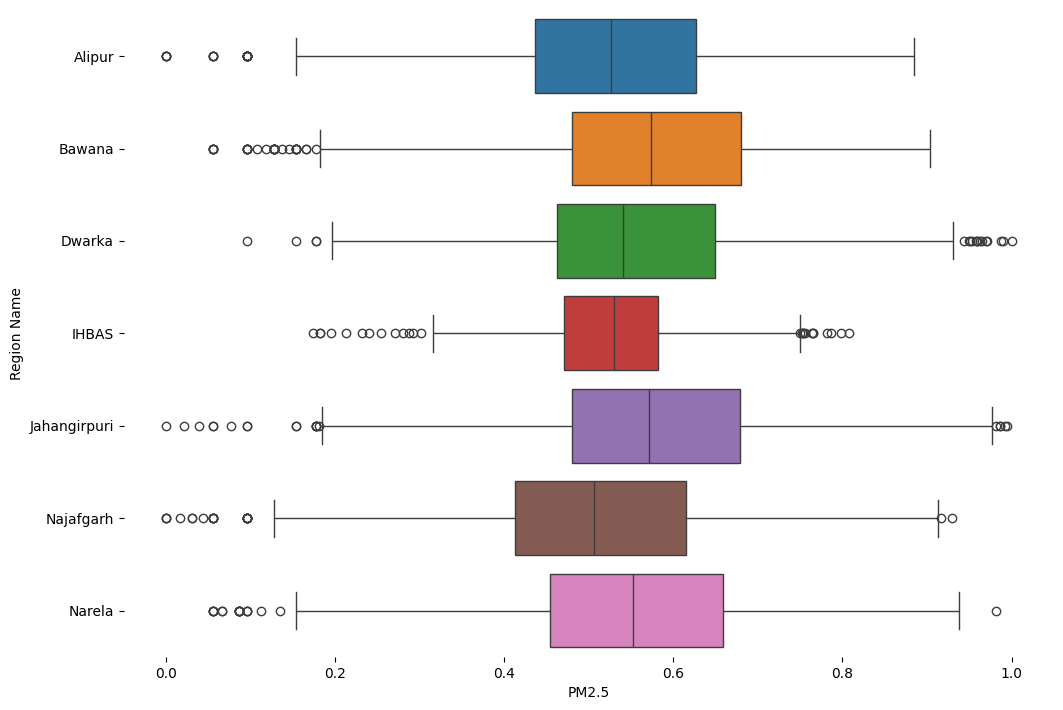

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region Name'].unique()))
plt.figure(figsize=figsize)
# The 'inner' argument is not supported by sns.boxplot() or ax.bxp() directly.
# Replace it with 'showmeans' to display means or remove it to display basic boxplot.
# For more control over inner points, use 'flierprops' or other boxplot properties.
sns.boxplot(df, x='PM2.5', y='Region Name',  hue='Region Name',legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd

def remove_outliers_regionwise(df, region_col='Region Name'):
    df_cleaned = pd.DataFrame()

    numeric_cols = df.select_dtypes(include=['number']).columns
    non_numeric_cols = df.select_dtypes(exclude=['number']).columns

    regions = df[region_col].unique()

    for region in regions:
        region_df = df[df[region_col] == region]

        for col in numeric_cols:
            Q1 = region_df[col].quantile(0.25)
            Q3 = region_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.25 * IQR
            upper_bound = Q3 + 1.25 * IQR
            region_df = region_df[(region_df[col] >= lower_bound) & (region_df[col] <= upper_bound)]

        df_cleaned = pd.concat([df_cleaned, region_df], axis=0)

    # Reset index if you want clean indexing
    return df_cleaned.reset_index(drop=True)

# Usage:
df_no_outliers = remove_outliers_regionwise(df, region_col='Region Name')


In [ ]:
df = df_no_outliers

In [ ]:
df.shape

(26834, 22)

In [ ]:
df.columns

Index(['Timestamp', 'Region Name', 'Current Speed', 'Free Flow Speed',
       'Traffic Level', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO', 'Ozone', 'RH', 'WD', 'Congestion Factor', 'PM2.5_PM10_Ratio',
       'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases',
       'Traffic Index'],
      dtype='object')

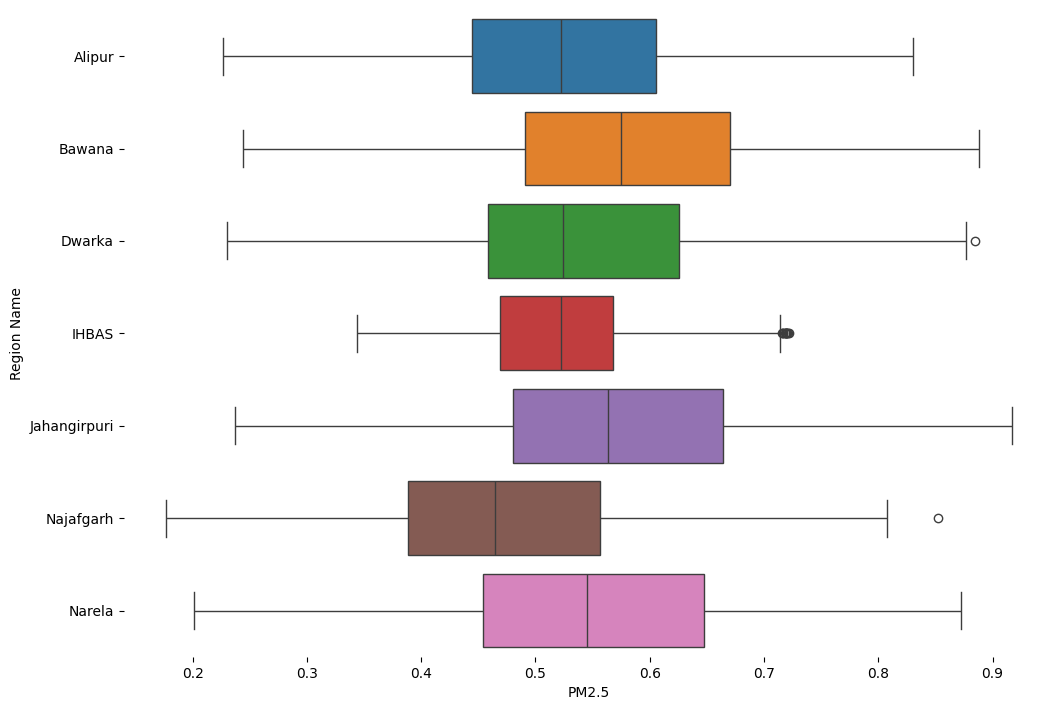

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Region Name'].unique()))
plt.figure(figsize=figsize)
# The 'inner' argument is not supported by sns.boxplot() or ax.bxp() directly.
# Replace it with 'showmeans' to display means or remove it to display basic boxplot.
# For more control over inner points, use 'flierprops' or other boxplot properties.
sns.boxplot(df, x='PM2.5', y='Region Name',  hue='Region Name',legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

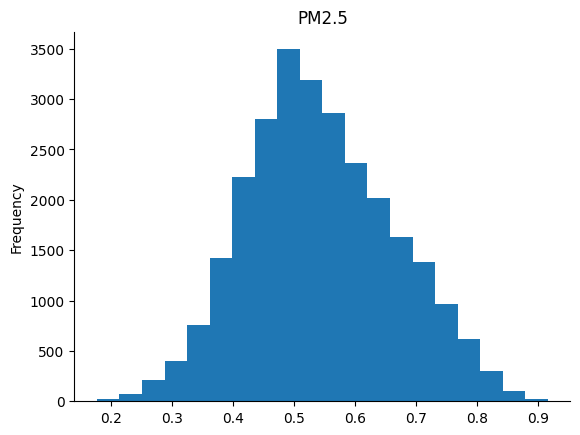

In [ ]:
from matplotlib import pyplot as plt
df['PM2.5'].plot(kind='hist', bins=20, title='PM2.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

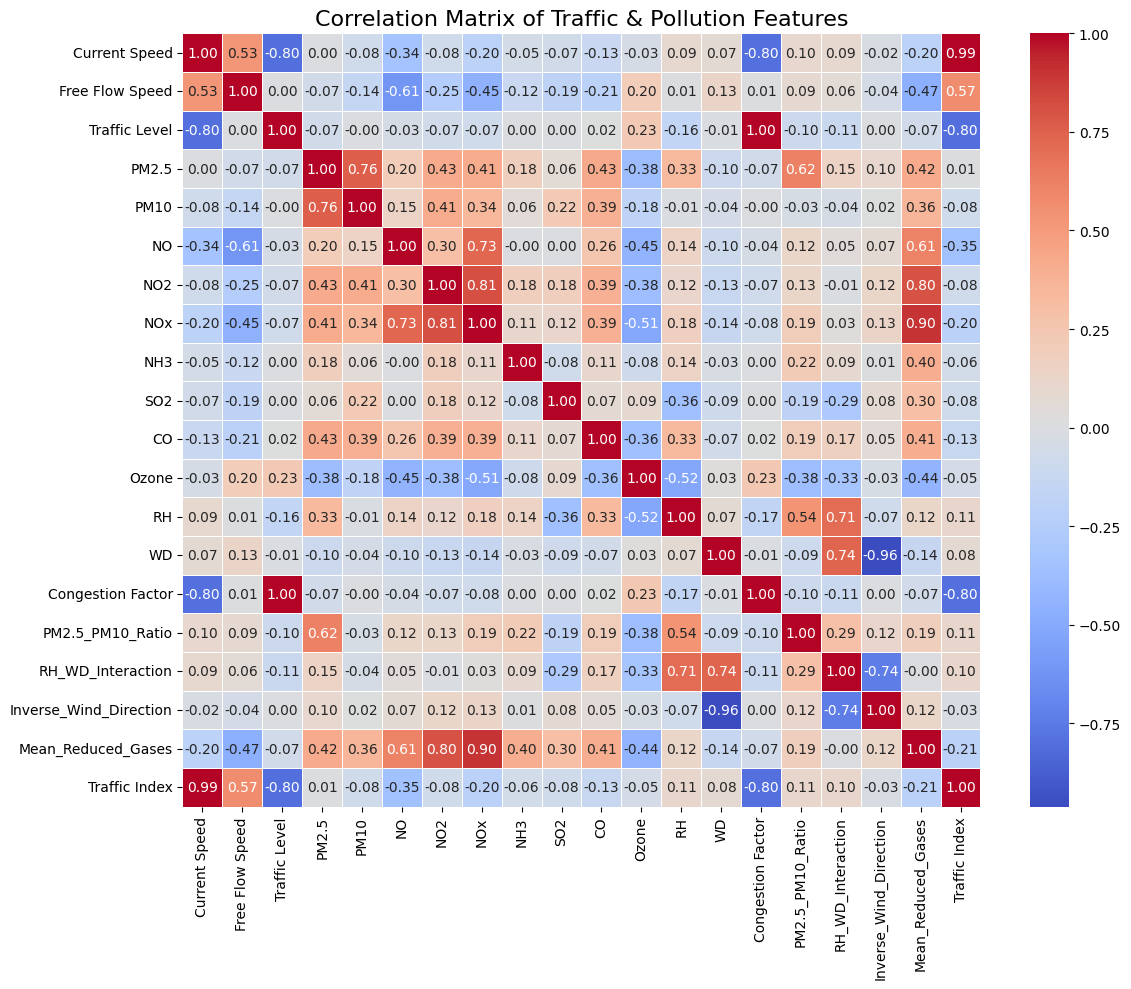

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv('your_dataset.csv')  # or whatever you are using

# Select only numerical features for correlation
numerical_features = ['Current Speed', 'Free Flow Speed',
       'Traffic Level', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO', 'Ozone', 'RH', 'WD', 'Congestion Factor', 'PM2.5_PM10_Ratio',
       'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases','Traffic Index']

# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot it nicely
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Traffic & Pollution Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(columns=['Ozone','WD'])

In [ ]:

# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import ipywidgets as widgets
# from IPython.display import display

# df2 = pd.read_excel(list(uploaded.keys())[0])
# df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], format='%d-%m-%Y %H:%M')
# df2.set_index('Timestamp', inplace=True)
# stations = df2['Region Name'].unique()
# colors = plt.cm.get_cmap('tab10', len(stations))
# station_colors = {station: colors(i) for i, station in enumerate(stations)}

# param_dropdown = widgets.Dropdown(
#     options=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WD'],
#     value='PM2.5',
#     description='Parameter:',
#     style={'description_width': 'initial'}
# )

# station1_dropdown = widgets.Dropdown(
#     options=stations,
#     value=stations[0],
#     description='Station 1:',
#     style={'description_width': 'initial'}
# )

# station2_dropdown = widgets.Dropdown(
#     options=stations,
#     value=stations[1] if len(stations) > 1 else stations[0],
#     description='Station 2:',
#     style={'description_width': 'initial'}
# )

# date_picker = widgets.DatePicker(
#     description='Select Date:',
#     disabled=False,
#     style={'description_width': 'initial'},
#     value=pd.to_datetime("2024-01-01")
# )

# def plot_comparison(parameter, station1, station2, selected_date):
#     selected_date = pd.to_datetime(selected_date)
#     start_time = selected_date.replace(hour=0, minute=0, second=0)
#     end_time = start_time + pd.Timedelta(hours=23, minutes=59)

#     plt.figure(figsize=(12, 6))

#     station1_data = df2[(df2['Region Name'] == station1) & (df2.index >= start_time) & (df2.index <= end_time)]
#     station2_data = df2[(df2['Region Name'] == station2) & (df2.index >= start_time) & (df2.index <= end_time)]

#     plt.bar(station1_data.index, station1_data[parameter], width=0.03, label=station1, color=station_colors[station1], alpha=0.7)
#     plt.bar(station2_data.index, station2_data[parameter], width=0.03, label=station2, color=station_colors[station2], alpha=0.7)

#     date_format = mdates.DateFormatter("%H:%M")
#     plt.gca().xaxis.set_major_formatter(date_format)
#     plt.xticks(rotation=45)

#     plt.xlabel("Time")
#     plt.ylabel(f"{parameter} Levels")
#     plt.title(f"Comparison of {parameter} Levels for {station1} and {station2} on {selected_date.date()}")
#     plt.legend()
#     plt.show()

# display(widgets.interactive(plot_comparison, parameter=param_dropdown, station1=station1_dropdown, station2=station2_dropdown, selected_date=date_picker))

In [ ]:
df.columns

Index(['Timestamp', 'Region Name', 'Current Speed', 'Free Flow Speed',
       'Traffic Level', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO', 'RH', 'Congestion Factor', 'PM2.5_PM10_Ratio',
       'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases',
       'Traffic Index'],
      dtype='object')

In [ ]:
def augment_data(X, y, noise_level=0.005, copies=100):
    augmented_X = [X]
    augmented_y = [y]

    for _ in range(copies):
        noise = np.random.normal(0, noise_level, X.shape)
        X_noisy = X + noise
        augmented_X.append(X_noisy)
        augmented_y.append(y)

    X_augmented = pd.concat(augmented_X, axis=0)
    y_augmented = pd.concat(augmented_y, axis=0)

    return X_augmented, y_augmented

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and 'PM2.5' is the target variable
# Select features and target
features = ['Current Speed', 'Free Flow Speed', 'Traffic Level', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',  'RH',  'Congestion Factor', 'PM2.5_PM10_Ratio', 'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases', 'Traffic Index']
target = 'PM2.5'
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test
# Create and train the Linear Regression model
model = LinearRegression()
# importance = pd.Series(model.coef_, index=X_train.columns)
# print(importance.sort_values())

# weak_features = importance[importance.abs() < 0.01].index
# X_train = X_train.drop(columns=weak_features)
# X_test = X_test.drop(columns=weak_features)
X_aug, y_aug = augment_data(X_train, y_train, noise_level=0.005, copies=10)

model.fit(X_aug, y_aug)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# You can now use the trained 'model' to make predictions on new data.

RMSE: 0.013229061858788227
R-squared: 0.987951539901529


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ['Current Speed', 'Free Flow Speed', 'Traffic Level', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',  'RH',  'Congestion Factor', 'PM2.5_PM10_Ratio', 'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases', 'Traffic Index']
target = 'PM2.5'
X = df[features]  # Replace 'features' with your feature columns
y = df[target]  # Replace 'target' with your target column


# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create your model
model = RandomForestRegressor(random_state=42)
X_aug, y_aug = augment_data(X_train, y_train, noise_level=0.003, copies=3)

# 3. Perform cross-validation
cv_scores = cross_val_score(model, X_aug, y_aug, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE

# 4. Train the model on the full training set
model.fit(X_aug, y_aug)

# 5. Evaluate on training and testing sets
y_train_pred = model.predict(X_aug)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_aug, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 6. Compare scores
print(f"Cross-validation RMSE: {cv_rmse_scores.mean():.4f} (std: {cv_rmse_scores.std():.4f})")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared for RandomForestRegressor: {r2}")

# 7. Check for overfitting
if train_rmse < cv_rmse_scores.mean() and train_rmse < test_rmse:
  print("Potential Overfitting: Training RMSE is much lower than CV and Testing RMSE.")
elif test_rmse > cv_rmse_scores.mean():
  print("Potential Overfitting: Testing RMSE is much higher than CV RMSE.")
else:
  print("Model seems to generalize well.")

Cross-validation RMSE: 0.0027 (std: 0.0009)
Training RMSE: 0.0011
Testing RMSE: 0.0026
R-squared for RandomForestRegressor: 0.987951539901529
Potential Overfitting: Training RMSE is much lower than CV and Testing RMSE.


In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import early_stopping

# df = df_original.copy()
features = df.columns.tolist()
features_to_remove = ["Region Name", "Timestamp", "PM2.5"] # Note: Corrected "Time Stamp" to "Timestamp"
for feature in features_to_remove:
    if feature in features:
        features.remove(feature)
X = df[features]
y = df["PM2.5"]

X = X.fillna(X.median())
y = y.fillna(y.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 50,
    "max_depth": 10,
    "n_estimators": 500,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}
X_aug, y_aug = augment_data(X_train, y_train, noise_level=0.005, copies=3)

lgb_train = lgb.Dataset(X_aug, y_aug)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
model = lgb.train(params, lgb_train, valid_sets=[lgb_test], callbacks=[early_stopping(50)])
y_pred = model.predict(X_test)
y_pred = np.nan_to_num(y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized RMSE (LightGBM): {rmse:.6f}")

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 85868, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.542590
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's rmse: 0.00355068
Optimized RMSE (LightGBM): 0.003551


In [ ]:
from scipy.stats import randint, uniform

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy.stats import uniform, randint

# Assuming 'df' is already loaded

# Convert 'Timestamp' to datetime objects if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract temporal features
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.day
df['month'] = df['Timestamp'].dt.month
df['weekday'] = df['Timestamp'].dt.weekday

# Encode 'Region Name'
le = LabelEncoder()
df['Region Name Encoded'] = le.fit_transform(df['Region Name'])

# Define target and features
target = 'PM2.5'
features = ['Current Speed', 'Free Flow Speed', 'Traffic Level',
            'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
            'RH',  'Congestion Factor', 'PM2.5_PM10_Ratio',
            'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases',
            'Traffic Index', 'hour', 'day', 'month', 'weekday',
            'Region Name Encoded']  # Removed 'PM2.5' from features

# Function to robustly fill missing values
def robust_fill_missing(df, feature):
    df[feature] = df.groupby(['Region Name', 'hour'])[feature].transform(
        lambda x: x.fillna(x.median()))
    df[feature].fillna(df[feature].median(), inplace=True)

# Apply imputation
for feat in features + [target]:
    robust_fill_missing(df, feat)

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and configure the XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter search space
param_distributions = {
    'n_estimators': randint(50, 150),  # Reduced upper bound
    'max_depth': randint(3, 5),        # Reduced upper bound
    'learning_rate': uniform(0.001, 0.01),
    'subsample': uniform(0.6, 0.4),        # Added subsample
    'gamma': uniform(0, 0.5),              # Added gamma
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings to sample
    scoring='neg_root_mean_squared_error',  # Use a suitable scoring metric
    cv=3,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores for parallel processing
)
X_aug, y_aug = augment_data(X_train, y_train, noise_level=0.01, copies=3)

# Fit the model
random_search.fit(X_aug, y_aug)

# Get the best model and make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best Parameters:", random_search.best_params_)
print("Test RMSE for PM2.5 prediction:", rmse)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

<ipython-input-43-0fc8ad8357a3>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(), inplace=True)
<ipython-input-43-0fc8ad8357a3>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'gamma': np.float64(0.29894998940554257), 'learning_rate': np.float64(0.01021874235023117), 'max_depth': 4, 'n_estimators': 127, 'subsample': np.float64(0.6783931449676581)}
Test RMSE for PM2.5 prediction: 0.03994450328069957
R2 Score: 0.8902


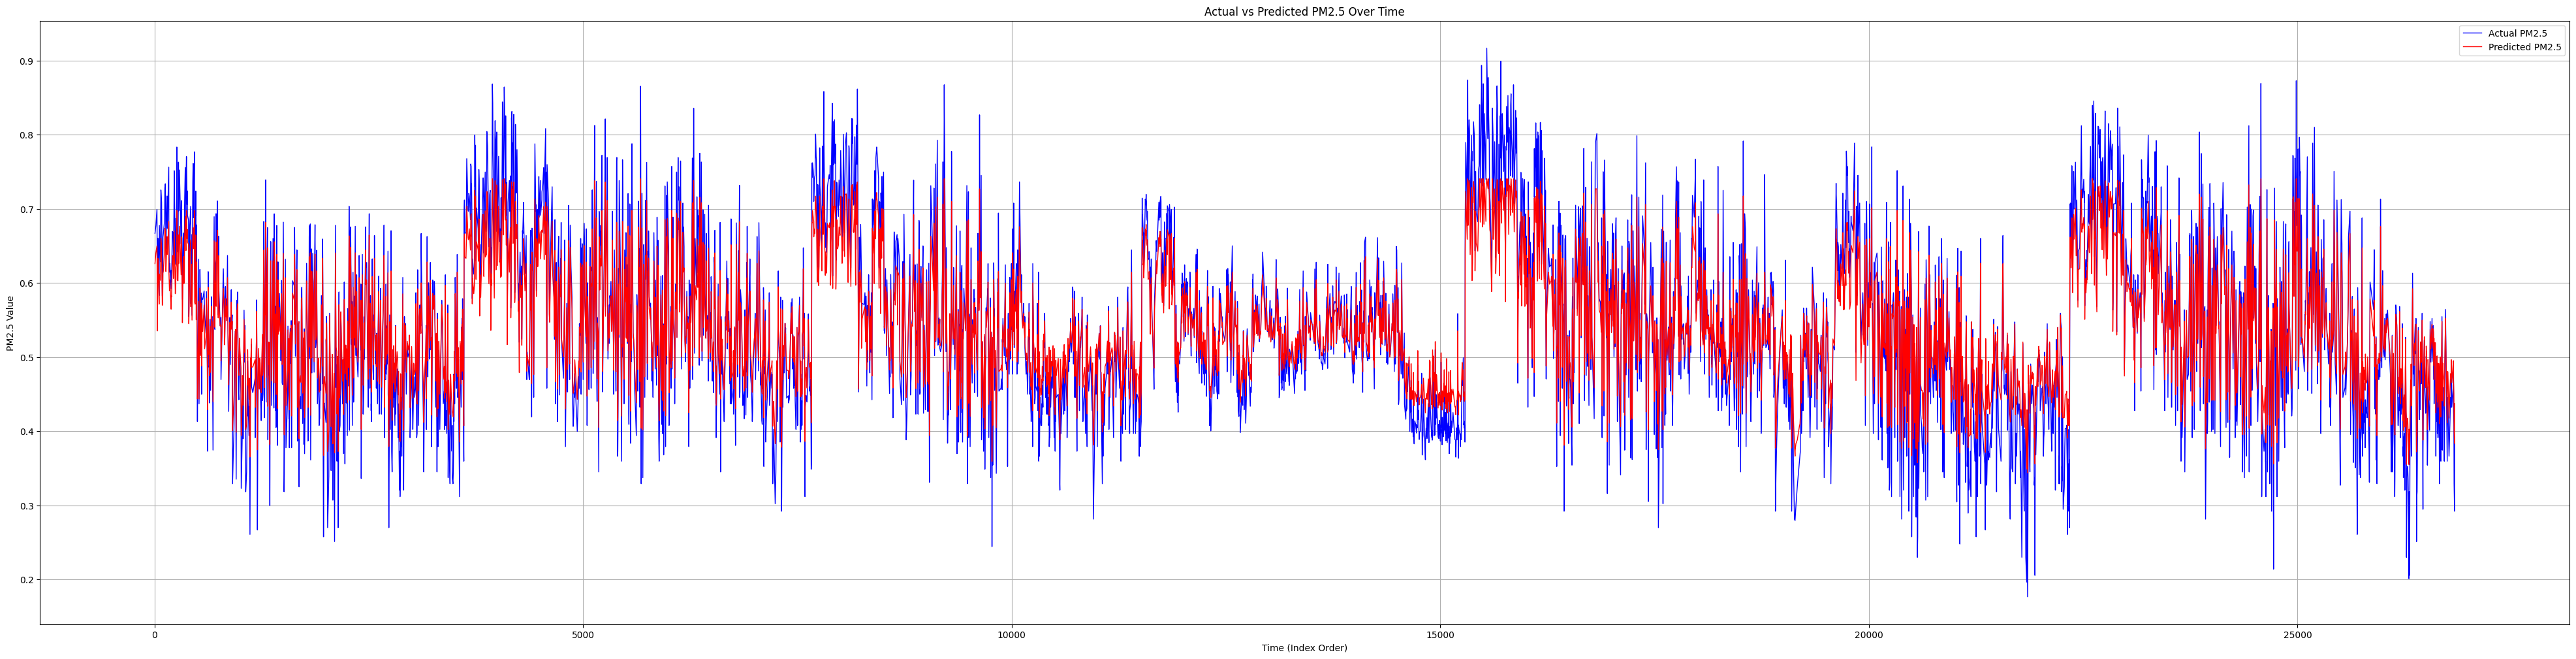

In [ ]:
import matplotlib.pyplot as plt
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()
plt.figure(figsize=(50, 12))
plt.plot(y_test_sorted.index, y_test_sorted, label="Actual PM2.5", color='blue', linewidth=1)
plt.plot(y_pred_sorted.index, y_pred_sorted, label="Predicted PM2.5", color='red', linewidth=1)

plt.xlabel("Time (Index Order)")
plt.ylabel("PM2.5 Value")
plt.title("Actual vs Predicted PM2.5 Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predicted_df = pd.DataFrame({'Predicted PM2.5': y_pred_sorted,'Actual Pm2.5':y_test_sorted})
predicted_df

Predicted PM2.5  Actual Pm2.5
6             0.626108      0.666891
17            0.640995      0.677672
29            0.649950      0.698994
30            0.631397      0.681642
34            0.535271      0.557501
...                ...           ...
26820         0.468818      0.427842
26824         0.450697      0.407914
26826         0.400508      0.329218
26831         0.383538      0.292170
26833         0.437370      0.391330

[5367 rows x 2 columns]

In [ ]:
# prompt: Using dataframe predicted_df: max absoulute difference between these two values

# Calculate the absolute difference between the two columns
predicted_df['Difference'] = abs(predicted_df['Predicted PM2.5'] - predicted_df['Actual Pm2.5'])

# Find the maximum absolute difference
max_difference = predicted_df['Difference'].max()

# Print the result
print(f"{max_difference=}")


max_difference=0.1775171844581736


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(columns=["Timestamp", "Region Name", "PM2.5"])  # Assuming PM2.5 is your target
y = df["PM2.5"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ElasticNet Model
elastic_net = ElasticNet()

# Hyperparameter Tuning (Grid Search)
param_grid = {
    'alpha': [0.001,0.01, 0.1, 1, 10, 50, 100],
    'l1_ratio': [0.2,0.01 ,0.5, 0.7, 0.9]
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
X_aug, y_aug = augment_data(X_train, y_train, noise_level=0.01, copies=3)
cv_scores = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Convert negative MSE to RMSE


grid_search.fit(X_aug, y_aug)

best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
print(f"RMSE: {rmse:.4f}")
print(f"Cross-validation RMSE: {cv_rmse_scores.mean():.4f} (std: {cv_rmse_scores.std():.4f})")
# ... (your existing code) ...

# After calculating test RMSE
if rmse > cv_rmse_scores.mean():
    print("Potential Overfitting: Test RMSE is higher than CV RMSE.")
else:
    print("Model seems to generalize well.")

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.01}
R2 Score: 0.9757
RMSE: 0.0188
Cross-validation RMSE: 0.1212 (std: 0.0005)
Model seems to generalize well.


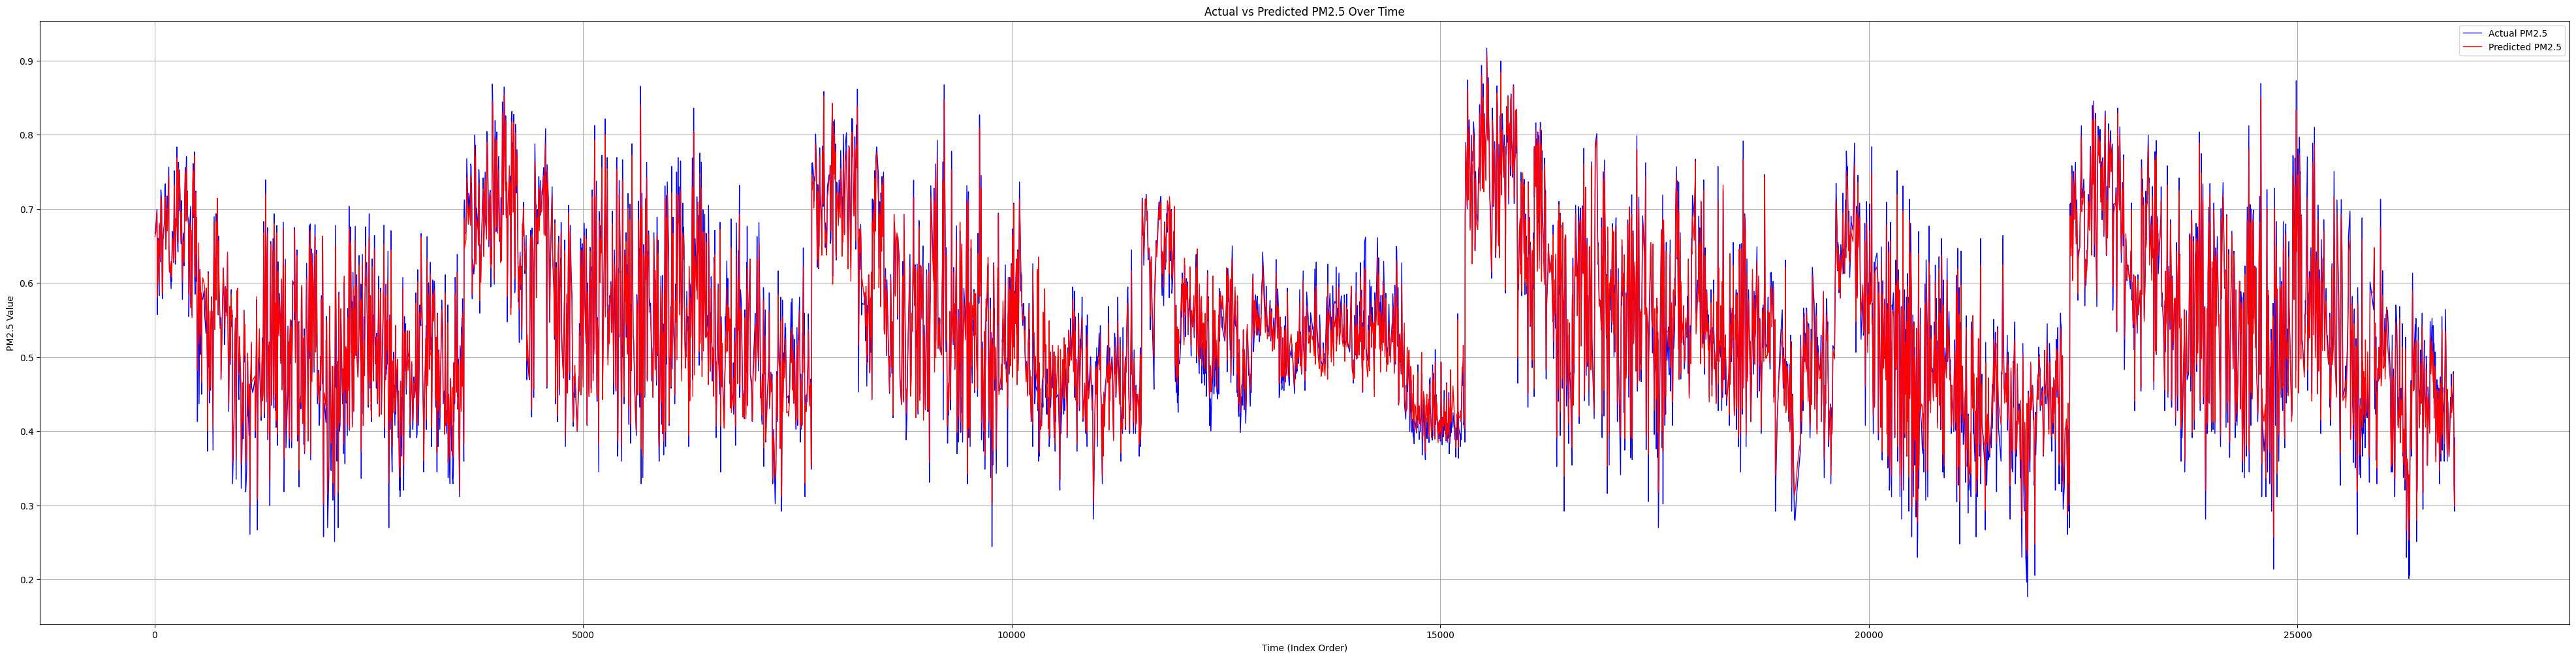

In [ ]:
import matplotlib.pyplot as plt
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()
plt.figure(figsize=(50, 12))
plt.plot(y_test_sorted.index, y_test_sorted, label="Actual PM2.5", color='blue', linewidth=1)
plt.plot(y_pred_sorted.index, y_pred_sorted, label="Predicted PM2.5", color='red', linewidth=1)

plt.xlabel("Time (Index Order)")
plt.ylabel("PM2.5 Value")
plt.title("Actual vs Predicted PM2.5 Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predicted_df = pd.DataFrame({'Predicted PM2.5': y_pred_sorted,'Actual Pm2.5':y_test_sorted})
predicted_df
# predicted_df.to_csv('predicted_pm25.csv', index=False)

Predicted PM2.5  Actual Pm2.5
6             0.662264      0.666891
17            0.669156      0.677672
29            0.695165      0.698994
30            0.681415      0.681642
34            0.581293      0.557501
...                ...           ...
26820         0.434851      0.427842
26824         0.395860      0.407914
26826         0.329091      0.329218
26831         0.299145      0.292170
26833         0.379412      0.391330

[5367 rows x 2 columns]

In [ ]:
# Calculate the absolute difference between the two columns
predicted_df['Difference'] = abs(predicted_df['Predicted PM2.5'] - predicted_df['Actual Pm2.5'])

# Find the maximum absolute difference
max_difference = predicted_df['Difference'].max()

# Print the result
print(f"{max_difference=}")


max_difference=0.17032975969534558


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# df = pd.read_csv("/content/its.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.day
df['month'] = df['Timestamp'].dt.month
df['weekday'] = df['Timestamp'].dt.weekday

le = LabelEncoder()
df['Region Name Encoded'] = le.fit_transform(df['Region Name'])

target = 'PM2.5'

features = ['Current Speed', 'Free Flow Speed',
       'Traffic Level', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2',
       'CO',  'RH',  'Congestion Factor', 'PM2.5_PM10_Ratio',
       'RH_WD_Interaction', 'Inverse_Wind_Direction', 'Mean_Reduced_Gases',
       'Traffic Index', 'hour', 'day', 'month', 'weekday', 'Region Name Encoded']

# Function to robustly fill missing values based on station and hour
def robust_fill_missing(df, feature):
    # Fill missing values using the median of groups defined by Station Name and hour
    df[feature] = df.groupby(['Region Name', 'hour'])[feature].transform(lambda x: x.fillna(x.median()))
    # For any remaining missing values, fill with overall median
    df[feature].fillna(df[feature].median(), inplace=True)

# Apply missing value imputation to each feature
for feat in features + [target]:
    robust_fill_missing(df, feat)

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.001]
}
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error', cv=3, verbose=1)
X_aug, y_aug = augment_data(X_train, y_train, noise_level=0.005, copies=30)
grid_search.fit(X_aug, y_aug)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)
print("Test RMSE for PM2.5 prediction:", rmse)
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

<ipython-input-51-d7a2bd35ebd9>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].median(), inplace=True)
<ipython-input-51-d7a2bd35ebd9>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Test RMSE for PM2.5 prediction: 0.016602924803718215
R2 Score: 0.9810


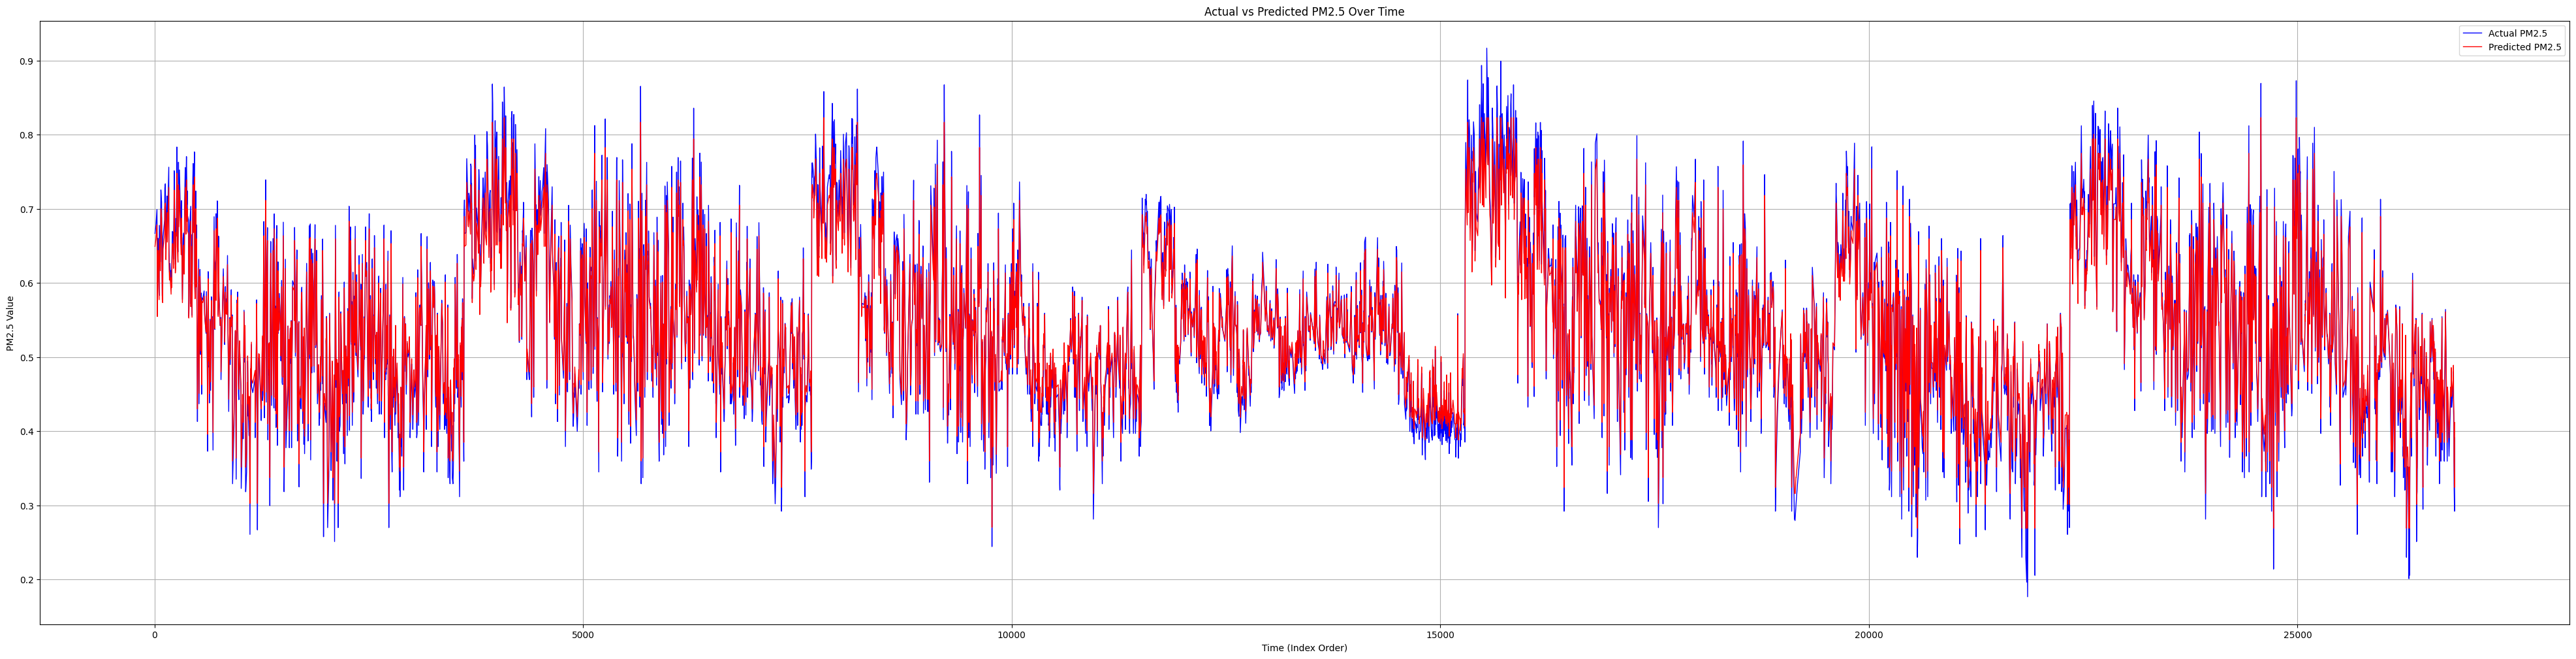

In [ ]:
import matplotlib.pyplot as plt
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()
plt.figure(figsize=(50, 12))
plt.plot(y_test_sorted.index, y_test_sorted, label="Actual PM2.5", color='blue', linewidth=1)
plt.plot(y_pred_sorted.index, y_pred_sorted, label="Predicted PM2.5", color='red', linewidth=1)

plt.xlabel("Time (Index Order)")
plt.ylabel("PM2.5 Value")
plt.title("Actual vs Predicted PM2.5 Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
predicted_df = pd.DataFrame({'Predicted PM2.5': y_pred_sorted,'Actual Pm2.5':y_test_sorted})
predicted_df
# predicted_df.to_csv('predicted_pm25.csv', index=False)

Predicted PM2.5  Actual Pm2.5
6             0.649317      0.666891
17            0.659455      0.677672
29            0.678106      0.698994
30            0.663614      0.681642
34            0.554700      0.557501
...                ...           ...
26820         0.444080      0.427842
26824         0.425601      0.407914
26826         0.359842      0.329218
26831         0.324306      0.292170
26833         0.411958      0.391330

[5367 rows x 2 columns]

In [ ]:
# Calculate the absolute difference between the two columns
predicted_df['Difference'] = abs(predicted_df['Predicted PM2.5'] - predicted_df['Actual Pm2.5'])

# Find the maximum absolute difference
max_difference = predicted_df['Difference'].max()
min_difference = predicted_df['Difference'].min()

# Print the result
print(f"{max_difference=}")
print(f"{min_difference=}")


max_difference=0.0936198680738779
min_difference=3.309322448408203e-06


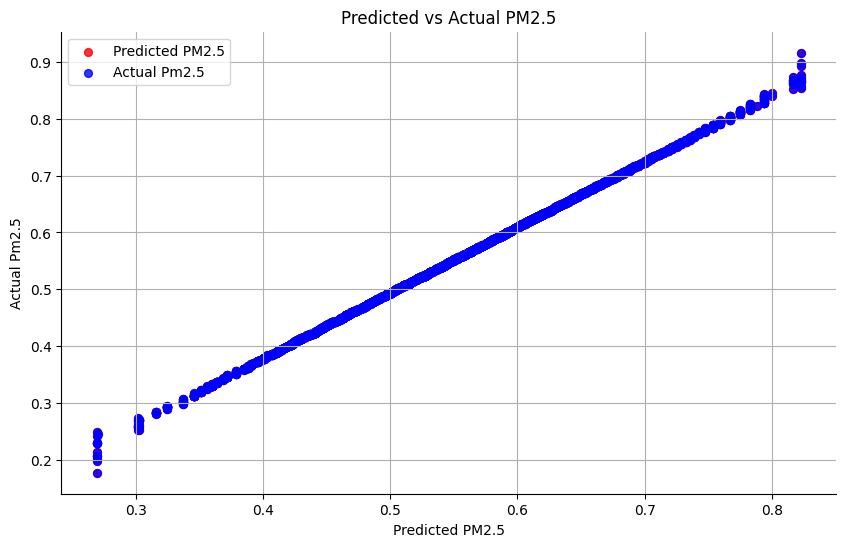

In [ ]:
from matplotlib import pyplot as plt

# Assuming 'predicted_df' contains 'Predicted PM2.5' and 'Actual Pm2.5' columns
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Scatter plot for 'Predicted PM2.5' in red
plt.scatter(predicted_df['Predicted PM2.5'], predicted_df['Actual Pm2.5'],
            c='red', s=32, alpha=0.8, label='Predicted PM2.5')

# Scatter plot for 'Actual Pm2.5' in blue (overlaid on the previous plot)
# Using the same x-values to ensure they align with the red points
plt.scatter(predicted_df['Predicted PM2.5'], predicted_df['Actual Pm2.5'],
            c='blue', s=32, alpha=0.8, label='Actual Pm2.5')

plt.xlabel("Predicted PM2.5")
plt.ylabel("Actual Pm2.5")
plt.title("Predicted vs Actual PM2.5")
plt.legend()
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
predicted_df

Predicted PM2.5  Actual Pm2.5  Difference
6             0.649317      0.666891    0.017574
17            0.659455      0.677672    0.018217
29            0.678106      0.698994    0.020888
30            0.663614      0.681642    0.018028
34            0.554700      0.557501    0.002801
...                ...           ...         ...
26820         0.444080      0.427842    0.016239
26824         0.425601      0.407914    0.017688
26826         0.359842      0.329218    0.030624
26831         0.324306      0.292170    0.032136
26833         0.411958      0.391330    0.020629

[5367 rows x 3 columns]

In [ ]:
predicted_df = predicted_df.drop(columns=['Difference'])

In [ ]:
predicted_df['PM2.5'] = predicted_df['Actual Pm2.5']

In [ ]:
predicted_df = predicted_df.drop(columns=['Actual Pm2.5'])

In [ ]:
filtered_df1 = predicted_df[predicted_df['PM2.5'].isin(df['PM2.5'])]
merged_df = pd.merge(filtered_df1, df[['Region Name']], left_index=True, right_index=True, how='left')
merged_df.reset_index(inplace=True)
merged_df.drop(columns=['index'], inplace=True)
merged_df

Predicted PM2.5     PM2.5 Region Name
0            0.649317  0.666891      Alipur
1            0.659455  0.677672      Alipur
2            0.678106  0.698994      Alipur
3            0.663614  0.681642      Alipur
4            0.554700  0.557501      Alipur
...               ...       ...         ...
5362         0.444080  0.427842      Narela
5363         0.425601  0.407914      Narela
5364         0.359842  0.329218      Narela
5365         0.324306  0.292170      Narela
5366         0.411958  0.391330      Narela

[5367 rows x 3 columns]

In [ ]:
new_column_order = ['Region Name', 'PM2.5', 'Predicted PM2.5']
merged_df = merged_df[new_column_order]
merged_df

Region Name     PM2.5  Predicted PM2.5
0         Alipur  0.666891         0.649317
1         Alipur  0.677672         0.659455
2         Alipur  0.698994         0.678106
3         Alipur  0.681642         0.663614
4         Alipur  0.557501         0.554700
...          ...       ...              ...
5362      Narela  0.427842         0.444080
5363      Narela  0.407914         0.425601
5364      Narela  0.329218         0.359842
5365      Narela  0.292170         0.324306
5366      Narela  0.391330         0.411958

[5367 rows x 3 columns]

In [ ]:
!pip install folium overpy

In [ ]:
import folium
import pandas as pd
import overpy

# Sample DataFrame with Region and Predicted PM2.5 values (Replace with your actual dataset)
map_df = merged_df[['Region Name','Predicted PM2.5']]
# Manually defined coordinates for each region
region_coordinates = {
    'Alipur': [28.7028, 77.1493],
    'Bawana': [28.7933, 77.0368],
    'Najafgarh': [28.5325, 77.0624],
    'Narela': [28.8250, 77.0880],
    'Dwarka': [28.5923, 77.0350],
    'Ihbas': [28.4777, 77.0350],
    'Jhangirpuri': [28.7150, 77.1503]
}

# Initialize the map centered around Delhi
delhi_map = folium.Map(location=[28.6139, 77.2090], zoom_start=11)

# Plotting PM2.5 values for the regions based on manually defined coordinates
for index, row in map_df.iterrows():
    region_name = row['Region Name']
    if region_name in region_coordinates:
        latitude, longitude = region_coordinates[region_name]

        folium.CircleMarker(
            location=[latitude, longitude],  # Coordinates from the dictionary
            radius=8,
            color='blue',  # You can change color based on PM2.5 value if needed
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"Region: {region_name}<br>Predicted PM2.5: {row['Predicted PM2.5']}",
        ).add_to(delhi_map)

# Add road network using Overpass API
api = overpy.Overpass()

# Overpass query to get all roads in Delhi
query = """
    [out:json];
    area["name"="Delhi"]->.searchArea;
    (
      way["highway"](area.searchArea);
    );
    out body;
"""
result = api.query(query)

# Convert the Overpass result to GeoJSON format
roads_geojson = {'type': 'FeatureCollection', 'features': []}

for way in result.ways:
    # Enable resolving missing nodes
    coordinates = [(node.lat, node.lon) for node in way.get_nodes(resolve_missing=True)]
    roads_geojson['features'].append({
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': coordinates
        },
        'properties': {'highway': way.tags.get('highway', 'unknown')}
    })
# Add the road network to the map
folium.GeoJson(roads_geojson).add_to(delhi_map)

# Save the map to an HTML file
# delhi_map.save("delhi_pm25_map.html")

# Show the map
delhi_map


OverpassGatewayTimeout: Server load too high